# Before starting:

    1)    
    curl -O https://repo1.maven.org/maven2/com/twitter/parquet-hadoop-bundle/1.6.0/parquet-hadoop-bundle-1.6.0.jar
    docker cp parquet-hadoop-bundle-1.6.0.jar jupyter-spark:/opt/spark/jars

    2)
    curl -O https://repo1.maven.org/maven2/org/apache/spark/spark-streaming-kafka-0-10_2.11/2.4.1/spark-streaming-kafka-0-10_2.11-2.4.1.jar
    docker cp spark-streaming-kafka-0-10_2.11-2.4.1.jar jupyter-spark:/opt/spark/jars

    3)
    curl -O https://repo1.maven.org/maven2/org/elasticsearch/elasticsearch-spark_2.10/2.4.1/elasticsearch-spark_2.10-2.4.1.jar
    docker cp elasticsearch-spark_2.10-2.4.1.jar jupyter-spark:/opt/spark/jars
    
    4) 
    curl -O https://repo1.maven.org/maven2/io/delta/delta-core_2.11/0.6.1/delta-core_2.11-0.6.1.jar
    docker cp delta-core_2.11-0.6.1.jar jupyter-spark:/opt/spark/jars

- Link data: https://mobileapps.saude.gov.br/esus-vepi/files/unAFkcaNDeXajurGB7LChj8SgQYS2ptm/04bd3419b22b9cc5c6efac2c6528100d_HIST_PAINEL_COVIDBR_06jul2021.rar

# 1. Sending data to HDFS

In [1]:
!hdfs dfs -ls /user/projetos_spark/basico/

Found 4 items
-rw-r--r--   3 root supergroup   62492959 2021-07-10 08:50 /user/projetos_spark/basico/HIST_PAINEL_COVIDBR_2020_Parte1_06jul2021.csv
-rw-r--r--   3 root supergroup   76520681 2021-07-10 08:50 /user/projetos_spark/basico/HIST_PAINEL_COVIDBR_2020_Parte2_06jul2021.csv
-rw-r--r--   3 root supergroup   91120916 2021-07-10 08:50 /user/projetos_spark/basico/HIST_PAINEL_COVIDBR_2021_Parte1_06jul2021.csv
-rw-r--r--   3 root supergroup    3046774 2021-07-10 08:50 /user/projetos_spark/basico/HIST_PAINEL_COVIDBR_2021_Parte2_06jul2021.csv


In [2]:
!hdfs dfs -cat /user/projetos_spark/basico/HIST_PAINEL_COVIDBR_2020_Parte1_06jul2021.csv | tail -5

# 2. Optimizing all hdfs data for a county-partitioned Hive table.

In [3]:
spark.catalog.listDatabases()

[Database(name='default', description='Default Hive database', locationUri='hdfs://namenode:8020/user/hive/warehouse')]

In [4]:
df1 = spark.read.csv('/user/projetos_spark/basico/HIST_PAINEL_COVIDBR_2020_Parte1_06jul2021.csv', sep =';', 
                    header = True)

df1.limit(10).toPandas()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,None,None,76,None,None,None,2020-02-25,9,210147125,0,0,0,0,None,None,None
1,Brasil,None,None,76,None,None,None,2020-02-26,9,210147125,1,1,0,0,None,None,None
2,Brasil,None,None,76,None,None,None,2020-02-27,9,210147125,1,0,0,0,None,None,None
3,Brasil,None,None,76,None,None,None,2020-02-28,9,210147125,1,0,0,0,None,None,None
4,Brasil,None,None,76,None,None,None,2020-02-29,9,210147125,2,1,0,0,None,None,None
5,Brasil,None,None,76,None,None,None,2020-03-01,10,210147125,2,0,0,0,None,None,None
6,Brasil,None,None,76,None,None,None,2020-03-02,10,210147125,2,0,0,0,None,None,None
7,Brasil,None,None,76,None,None,None,2020-03-03,10,210147125,2,0,0,0,None,None,None
8,Brasil,None,None,76,None,None,None,2020-03-04,10,210147125,3,1,0,0,None,None,None
9,Brasil,None,None,76,None,None,None,2020-03-05,10,210147125,7,4,0,0,None,None,None


In [5]:
df2 = spark.read.csv('/user/projetos_spark/basico/HIST_PAINEL_COVIDBR_2020_Parte2_06jul2021.csv', header = True, 
               sep = ';')
df2.limit(10).toPandas()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,None,None,76,None,None,None,2020-08-01,31,210147125,2707877,45392,93563,1088,1865729,748585,None
1,Brasil,None,None,76,None,None,None,2020-08-02,32,210147125,2733677,25800,94104,541,1883677,755896,None
2,Brasil,None,None,76,None,None,None,2020-08-03,32,210147125,2750318,16641,94665,561,1912319,743334,None
3,Brasil,None,None,76,None,None,None,2020-08-04,32,210147125,2801921,51603,95819,1154,1970767,735335,None
4,Brasil,None,None,76,None,None,None,2020-08-05,32,210147125,2857597,55676,97240,1421,2020637,741180,None
5,Brasil,None,None,76,None,None,None,2020-08-06,32,210147125,2912212,54615,98493,1253,2080916,781954,None
6,Brasil,None,None,76,None,None,None,2020-08-07,32,210147125,2962442,50230,99572,1079,2068394,794476,None
7,Brasil,None,None,76,None,None,None,2020-08-08,32,210147125,3012412,49970,100477,905,2094293,817642,None
8,Brasil,None,None,76,None,None,None,2020-08-09,33,210147125,3035422,23010,101049,572,2118460,815913,None
9,Brasil,None,None,76,None,None,None,2020-08-10,33,210147125,3057470,22048,101752,703,2163812,791906,None


In [6]:
df3 = spark.read.csv('/user/projetos_spark/basico/HIST_PAINEL_COVIDBR_2021_Parte1_06jul2021.csv', header = True, 
               sep = ';')
df3.limit(10).toPandas()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,None,None,76,None,None,None,2021-01-01,53,210147125,7700578,24605,195411,462,6756284,748883,None
1,Brasil,None,None,76,None,None,None,2021-01-02,53,210147125,7716405,15827,195725,314,6769420,751260,None
2,Brasil,None,None,76,None,None,None,2021-01-03,1,210147125,7733746,17341,196018,293,6813008,724720,None
3,Brasil,None,None,76,None,None,None,2021-01-04,1,210147125,7753752,20006,196561,543,6875230,681961,None
4,Brasil,None,None,76,None,None,None,2021-01-05,1,210147125,7810400,56648,197732,1171,6963407,649261,None
5,Brasil,None,None,76,None,None,None,2021-01-06,1,210147125,7873830,63430,198974,1242,7036530,638326,None
6,Brasil,None,None,76,None,None,None,2021-01-07,1,210147125,7961673,87843,200498,1524,7096931,664244,None
7,Brasil,None,None,76,None,None,None,2021-01-08,1,210147125,8013708,52035,201460,962,7114474,697774,None
8,Brasil,None,None,76,None,None,None,2021-01-09,1,210147125,8075998,62290,202631,1171,7144011,729356,None
9,Brasil,None,None,76,None,None,None,2021-01-10,2,210147125,8105790,29792,203100,469,7167651,735039,None


In [7]:
df4 = spark.read.csv('/user/projetos_spark/basico/HIST_PAINEL_COVIDBR_2021_Parte2_06jul2021.csv', header = True, 
               sep = ';')
df4.limit(10).toPandas()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,None,None,76,None,None,None,2021-07-01,26,210147125,18622304,65163,520095,2029,16931272,1170937,None
1,Brasil,None,None,76,None,None,None,2021-07-02,26,210147125,18687469,65165,521952,1857,16989351,1176166,None
2,Brasil,None,None,76,None,None,None,2021-07-03,26,210147125,18742025,54556,523587,1635,17033808,1184630,None
3,Brasil,None,None,76,None,None,None,2021-07-04,27,210147125,18769808,27783,524417,830,17082876,1162515,None
4,Brasil,None,None,76,None,None,None,2021-07-05,27,210147125,18792511,22703,525112,695,17151673,1115726,None
5,Brasil,None,None,76,None,None,None,2021-07-06,27,210147125,18855015,62504,526892,1780,17262646,1065477,None
6,Norte,RO,None,11,None,None,None,2021-07-01,26,1777225,248173,566,6149,13,None,None,None
7,Norte,RO,None,11,None,None,None,2021-07-02,26,1777225,248485,312,6170,21,None,None,None
8,Norte,RO,None,11,None,None,None,2021-07-03,26,1777225,249496,1011,6172,2,None,None,None
9,Norte,RO,None,11,None,None,None,2021-07-04,27,1777225,249547,51,6173,1,None,None,None


In [ ]:
#!pip install delta-spark
from delta import *

df1.write.format("delta").partitionBy("municipio").saveAsTable('df1')
df2.write.format("delta").partitionBy("municipio").saveAsTable('df2')
df3.write.format("delta").partitionBy("municipio").saveAsTable('df3')
df4.write.format("delta").partitionBy("municipio").saveAsTable('df4')

In [11]:
!hdfs dfs -ls /user/hive/warehouse/

Found 8 items
drwxr-xr-x   - root supergroup          0 2021-07-10 16:21 /user/hive/warehouse/df1
drwxr-xr-x   - root supergroup          0 2021-07-10 16:21 /user/hive/warehouse/df2
drwxr-xr-x   - root supergroup          0 2021-07-10 16:22 /user/hive/warehouse/df3
drwxr-xr-x   - root supergroup          0 2021-07-10 16:22 /user/hive/warehouse/df4
drwxr-xr-x   - root supergroup          0 2021-07-17 15:49 /user/hive/warehouse/elastic_search
drwxr-xr-x   - root supergroup          0 2021-07-17 14:45 /user/hive/warehouse/teste
drwxr-xr-x   - root supergroup          0 2021-07-14 01:15 /user/hive/warehouse/view1
drwxr-xr-x   - root supergroup          0 2021-07-14 01:26 /user/hive/warehouse/view2


# 3. Creating the 3 views by Spark with data sent to HDFS

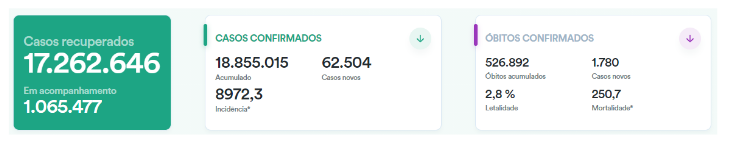

This view refers to the day _2021-07-06_

In [12]:
df4_delta = spark.read.format('delta').load('/user/hive/warehouse/df4')

In [13]:
#To confirm the date:

from pyspark.sql.functions import *
from pyspark.sql.types import *

df4_delta.agg(max('data').alias('max data')).toPandas()

,max data
0,2021-07-06


In [14]:
#PYSPARK OPTION

# CASOS RECUPERADOS 
casos_recuperados = df4_delta\
         .where((df4_delta.data == '2021-07-06') & 
                (df4_delta['Recuperadosnovos'].isNotNull()))\
         .agg(regexp_replace(format_number(sum('Recuperadosnovos'),0),',','.')\
         .alias('CasosRecuperados'))

# CASOS EM ACOMPANHAMENTO
casos_em_acompanhamento = df4_delta\
         .where((df4_delta.data == '2021-07-06') & 
                (df4_delta['Recuperadosnovos'].isNotNull()))\
         .agg(regexp_replace(format_number(sum('emAcompanhamentoNovos'),0),',','.')\
         .alias('EmAcompanhamento'))

# CASOS CONFIRMADOS
casos_confirmados_df = df4_delta\
         .where((df4_delta.data == '2021-07-06') & 
                (df4_delta.regiao == 'Brasil'))\
         .agg((regexp_replace(format_number((sum('Recuperadosnovos') + 
                                             sum('emAcompanhamentoNovos') + 
                                             sum('obitosAcumulado')),0),',','.')\
         .alias('Acumulado')),
              
         regexp_replace(format_number(sum('casosNovos'),0),',','.')\
         .alias('CasosNovos'),
              
         round((((sum('Recuperadosnovos') + 
                  sum('emAcompanhamentoNovos') + 
                 (sum('obitosAcumulado'))) * 100000)) / (sum('populacaoTCU2019')), 1)\
         .alias('Incidencia'))

casos_confirmados = casos_confirmados_df\
                .withColumn('Incidencia',regexp_replace('Incidencia','8972.3','8972,3'))

#ÓBITOS CONFIRMADOS
obitos_confirmados_df = df4_delta\
               .where((df4_delta.data == '2021-07-06') & 
                      (df4_delta.regiao == 'Brasil'))\
               .agg(regexp_replace(format_number(sum('obitosAcumulado'),0),',','.')\
               .alias('ObitosAcumulados'),
                    
               regexp_replace(format_number(sum('obitosNovos'),0),',','.')\
               .alias('ObitosNovos'),
                    
                round(((sum('obitosAcumulado')) * 100) /
                            (sum('Recuperadosnovos') + 
                             sum('emAcompanhamentoNovos') + 
                             (sum('obitosAcumulado'))),1)\
               .alias('Letalidade'),
                   
                            format_number(((((sum('obitosAcumulado'))) * 100000)) / 
                            sum('populacaoTCU2019'), 1)\
                .alias('Mortalidade'))

obitos_confirmados = obitos_confirmados_df\
                .withColumn('Letalidade', concat(col('Letalidade'), lit(' %')))\
                .withColumn('Mortalidade',regexp_replace('Mortalidade','250.7','250,7'))

         
#JOIN ALL TO ANALYSE VALUES

casos_recuperados.crossJoin(casos_em_acompanhamento).crossJoin(casos_confirmados)\
                 .crossJoin(obitos_confirmados).toPandas()

,CasosRecuperados,EmAcompanhamento,Acumulado,CasosNovos,Incidencia,ObitosAcumulados,ObitosNovos,Letalidade,Mortalidade
0,17.262.646,1.065.477,18.855.015,62.504,"8972,3",526.892,1.780,2.8 %,"250,7"


In [15]:
#SQL OPTION (SPARK SQL)

# CASOS RECUPERADOS 
casos_recuperados = spark.sql('''
select
regexp_replace(format_number(sum(Recuperadosnovos),0),',','.') as CasosRecuperados
from df4
where data = (select max(cast(data as date)) from df4)
''')

# CASOS EM ACOMPANHAMENTO
casos_em_acompanhamento = spark.sql(''' 
select
regexp_replace(format_number(sum(emAcompanhamentoNovos),0),',','.') as EmAcompanhamento
from df4
where data = (select max(cast(data as date)) from df4)
''')

# CASOS CONFIRMADOS
casos_confirmados = spark.sql('''
select
regexp_replace(format_number((sum(Recuperadosnovos) + 
sum(emAcompanhamentoNovos) + (sum(obitosAcumulado))),0),',','.') 
as Acumulado,
regexp_replace(format_number(sum(casosNovos),0),',','.')
as CasosNovos,
replace(round((((sum(Recuperadosnovos) 
+ sum(emAcompanhamentoNovos) + (sum(obitosAcumulado))) * 100000)) / 
(select avg(populacaoTCU2019) from df4 where regiao = 'Brasil'),1),'.',',')
as Incidencia
from df4
where data = (select max(cast(data as date)) from df4) and (obitosAcumulado,casosNovos) in 
(select obitosAcumulado,casosNovos
from df4 where regiao = 'Brasil')
''')

# ÓBITOS CONFIRMADOS
obitos_confirmados = spark.sql('''
select
regexp_replace(format_number(((sum(obitosAcumulado))),0),',','.') 
as ObitosAcumulados,
regexp_replace(format_number(sum(obitosNovos),0),',','.') 
as ObitosNovos,
concat(round(((sum(obitosAcumulado)) * 100) / 
(sum(Recuperadosnovos) + sum(emAcompanhamentoNovos) + (sum(obitosAcumulado))),1),' %') 
as Letalidade,
replace(round(((((sum(obitosAcumulado))) * 100000)) / 
sum(populacaoTCU2019), 1),'.',',') 
as Mortalidade
from df4
where data = (select max(cast(data as date)) from df4) and (obitosAcumulado,obitosNovos) in 
(select obitosAcumulado,obitosNovos
from df4 where regiao = "Brasil")
''')

#JOIN ALL TO ANALYSE VALUES

casos_recuperados.crossJoin(casos_em_acompanhamento)\
                 .crossJoin(casos_confirmados)\
                 .crossJoin(obitos_confirmados).toPandas()

,CasosRecuperados,EmAcompanhamento,Acumulado,CasosNovos,Incidencia,ObitosAcumulados,ObitosNovos,Letalidade,Mortalidade
0,17.262.646,1.065.477,18.855.015,62.504,"8972,3",526.892,1.780,2.8 %,"250,7"


# 4.Saving the first view as a Hive table

In [ ]:
view1 = casos_recuperados.crossJoin(casos_em_acompanhamento)
view1.write.format('delta').saveAsTable('view1')

In [16]:
!hdfs dfs -ls /user/hive/warehouse/view1

Found 2 items
drwxr-xr-x   - root supergroup          0 2021-07-14 01:15 /user/hive/warehouse/view1/_delta_log
-rw-r--r--   2 root supergroup        788 2021-07-14 01:15 /user/hive/warehouse/view1/part-00000-f3ee9bd8-8aa2-485f-9677-932b7cdcb7fe-c000.snappy.parquet


In [17]:
spark.read.table('view1').toPandas()

,CasosRecuperados,EmAcompanhamento
0,17.262.646,1.065.477


# 5.Saving the second view with parquet format and snappy compression

In [ ]:
view2 = casos_confirmados
view2.write.option("compression","snappy").parquet('/user/hive/warehouse/view2')

In [18]:
!hdfs dfs -ls /user/hive/warehouse/view2

Found 2 items
-rw-r--r--   2 root supergroup          0 2021-07-14 01:26 /user/hive/warehouse/view2/_SUCCESS
-rw-r--r--   2 root supergroup        967 2021-07-14 01:26 /user/hive/warehouse/view2/part-00000-77bf3bf2-a7f9-47fa-8d75-427418b78ff9-c000.snappy.parquet


In [19]:
spark.read\
    .parquet('/user/hive/warehouse/view2/part-00000-77bf3bf2-a7f9-47fa-8d75-427418b78ff9-c000.snappy.parquet')\
    .toPandas()

,Acumulado,CasosNovos,Incidencia
0,18.855.015,62.504,"8972,3"


# 6.Saving the third view to a topic in Kafka

In [20]:
view3 = obitos_confirmados 
view3.toPandas()

,ObitosAcumulados,ObitosNovos,Letalidade,Mortalidade
0,526.892,1.780,2.8 %,"250,7"


First:

In my folder with docker-compose, I opened a terminal and wrote this:
    
    docker exec -it kafka bash

In the kafka container, I created a topic with name "view3":
    
    kafka-topics.sh --bootstrap-server kafka:9092 --topic view3 --create --partitions 1 --replication-factor 1

    kafka-topics.sh --bootstrap-server kafka:9092 --list (to confirm if exists my topic)

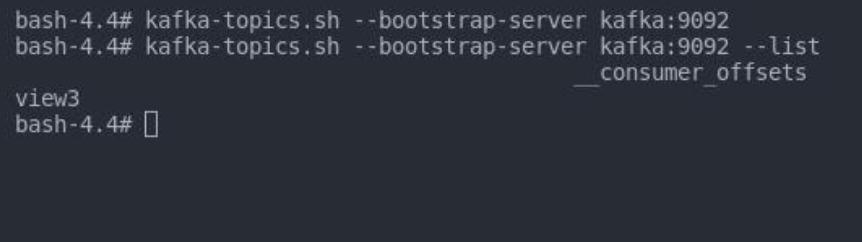

And after that, before running _"spark as producer"_, in the terminal I wrote:

    kafka-console-consumer.sh --bootstrap-server kafka:9092 --topic view3
    
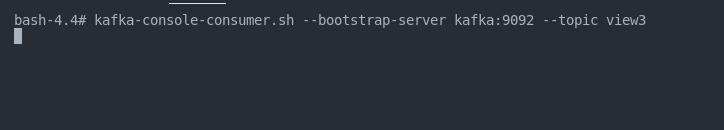

The kafka consumer will be waiting for some message to be sent! So let's send!

In [21]:
view3_kafka = view3\
            .withColumn("value", to_json(struct("ObitosAcumulados", "ObitosNovos","Letalidade","Mortalidade")))

In [ ]:
view3_kafka.write\
    .format("kafka") \
    .option("kafka.bootstrap.servers", "kafka:9092")\
    .option("topic","view3")\
    .save()

- view3 topic on kafka container

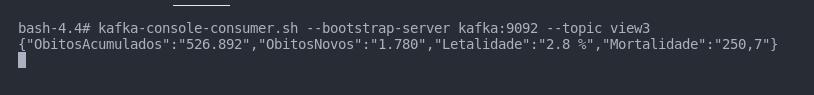

And now, let's see and read with pyspark!

In [22]:
view3_kafka_df = spark\
    .read\
    .format("kafka")\
    .option("kafka.bootstrap.servers", "kafka:9092")\
    .option("subscribe", "view3")\
    .load()

view3_kafka_df.printSchema()

root
 |-- key: binary (nullable = true)
 |-- value: binary (nullable = true)
 |-- topic: string (nullable = true)
 |-- partition: integer (nullable = true)
 |-- offset: long (nullable = true)
 |-- timestamp: timestamp (nullable = true)
 |-- timestampType: integer (nullable = true)



In [23]:
view3_kafka_df.select(col('value').cast(StringType()).alias('topic_view3'))\
              .limit(1)\
              .show(truncate = False)

+-----------------------------------------------------------------------------------------------+
|topic_view3                                                                                    |
+-----------------------------------------------------------------------------------------------+
|{"ObitosAcumulados":"526.892","ObitosNovos":"1.780","Letalidade":"2.8 %","Mortalidade":"250,7"}|
+-----------------------------------------------------------------------------------------------+



# 7. Creating this view with Pyspark and SQL (Spark), with the data sent to HDFS:

- The date is the same!

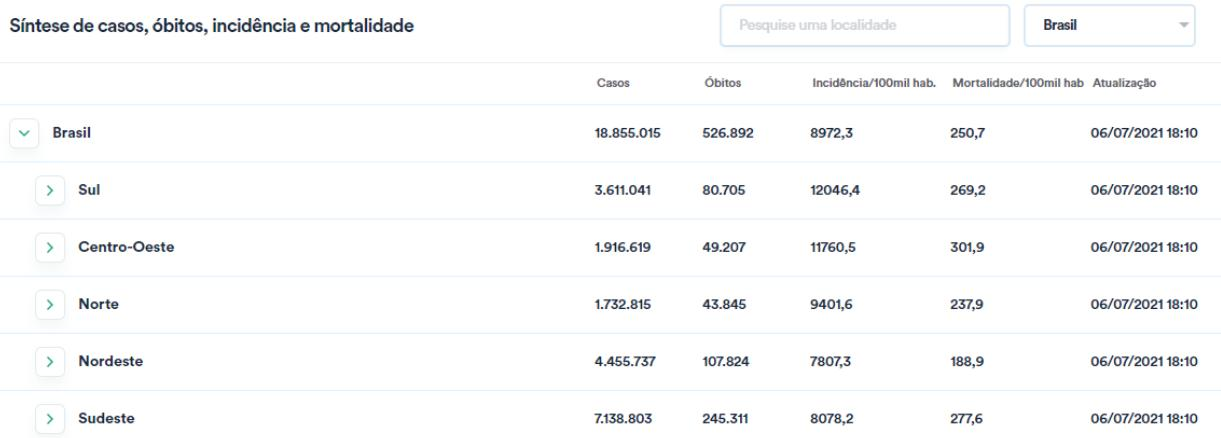

In [24]:
#PYSPARK OPTION

data1 = df4_delta.withColumn('Visualizacao',unix_timestamp(col('data'),'yyyy-MM-dd'))
data = data1.withColumn('Visualizacao', from_unixtime(unix_timestamp(col('data'),'yyyy-MM-dd'),
                                                          'dd/MM/yyyy 18:10'))\
            .where('Visualizacao == "06/07/2021 18:10"').limit(1)\
            .select('Visualizacao')


#BRASIL
br_join = casos_recuperados.crossJoin(casos_em_acompanhamento).crossJoin(casos_confirmados)\
                 .crossJoin(obitos_confirmados).crossJoin(data)\
                 .withColumn('Regiao', lit('Brasil'))\
                 .select('Regiao','Acumulado','ObitosAcumulados','Incidencia','Mortalidade','Visualizacao')
Brasil = br_join\
    .withColumnRenamed('Acumulado','Casos')\
    .withColumnRenamed('ObitosAcumulados','Óbitos')\
    .withColumnRenamed('Incidencia','Incidencia/100mil hab.')\
    .withColumnRenamed('Mortalidade','Mortalidade/100mil hab.')

#SUL
sul_df1 = df4_delta\
        .select('Regiao','populacaoTCU2019','obitosAcumulado','casosAcumulado','estado')\
        .where(df4_delta.regiao == 'Sul')\
        .withColumn('populacaoTCU2019',col('populacaoTCU2019').cast(IntegerType()))\
        .withColumn('obitosAcumulado',col('obitosAcumulado').cast(IntegerType()))\
        .withColumn('casosAcumulado',col('casosAcumulado').cast(IntegerType()))\
        .groupBy('estado')\
        .agg(max('populacaoTCU2019').alias('populacaoTCU2019'), 
             max('obitosAcumulado').alias('obitosAcumulado'),
             max('casosAcumulado').alias('casosAcumulado'))

sul_adjusting = sul_df1\
            .agg( regexp_replace(format_number(sum('casosAcumulado'),0),',','.').alias('Casos'),
                  regexp_replace(format_number(sum('obitosAcumulado'),0),',','.').alias('Óbitos'),
                  round((((sum('casosAcumulado')) * 100000) / sum('populacaoTCU2019')),1)\
                      .alias('Incidencia'),
                  round((((sum('obitosAcumulado')) * 100000) / sum('populacaoTCU2019')),1)\
                      .alias('Mortalidade'))\
             .withColumn('Regiao', lit('Sul'))

Sul = sul_adjusting\
        .select(sul_adjusting.columns[-1],sul_adjusting.columns[0],sul_adjusting.columns[1],
                sul_adjusting.columns[2],sul_adjusting.columns[3])\
        .withColumn('Incidencia', regexp_replace('Incidencia','12046.4','12046,4'))\
        .withColumn('Mortalidade', regexp_replace('Mortalidade','269.2','269,2'))\
        .withColumnRenamed('Incidencia','Incidencia/100mil hab.')\
        .withColumnRenamed('Mortalidade','Mortalidade/100mil hab.')\
        .crossJoin(data)

#CENTRO-OESTE
co_df1 = df4_delta\
        .select('Regiao','populacaoTCU2019','obitosAcumulado','casosAcumulado','estado')\
        .where(df4_delta.regiao == 'Centro-Oeste')\
        .withColumn('populacaoTCU2019',col('populacaoTCU2019').cast(IntegerType()))\
        .withColumn('obitosAcumulado',col('obitosAcumulado').cast(IntegerType()))\
        .withColumn('casosAcumulado',col('casosAcumulado').cast(IntegerType()))\
        .groupBy('estado')\
        .agg(max('populacaoTCU2019').alias('populacaoTCU2019'), 
             max('obitosAcumulado').alias('obitosAcumulado'),
             max('casosAcumulado').alias('casosAcumulado'))

co_adjusting = co_df1\
            .agg( regexp_replace(format_number(sum('casosAcumulado'),0),',','.').alias('Casos'),
                  regexp_replace(format_number(sum('obitosAcumulado'),0),',','.').alias('Óbitos'),
                  round((((sum('casosAcumulado')) * 100000) / sum('populacaoTCU2019')),1)\
                      .alias('Incidencia'),
                  round((((sum('obitosAcumulado')) * 100000) / sum('populacaoTCU2019')),1)\
                      .alias('Mortalidade'))\
             .withColumn('Regiao', lit('Centro-Oeste'))

CentroOeste = co_adjusting\
        .select(co_adjusting.columns[-1],co_adjusting.columns[0],co_adjusting.columns[1],
                co_adjusting.columns[2],
                co_adjusting.columns[3])\
        .withColumn('Incidencia', regexp_replace('Incidencia','11760.5','11760,5'))\
        .withColumn('Mortalidade', regexp_replace('Mortalidade','301.9','301,9'))\
        .withColumnRenamed('Incidencia','Incidencia/100mil hab.')\
        .withColumnRenamed('Mortalidade','Mortalidade/100mil hab.')\
        .crossJoin(data)

#NORTE
norte_df1 = df4_delta\
        .select('Regiao','populacaoTCU2019','obitosAcumulado','casosAcumulado','estado')\
        .where(df4_delta.regiao == 'Norte')\
        .withColumn('populacaoTCU2019',col('populacaoTCU2019').cast(IntegerType()))\
        .withColumn('obitosAcumulado',col('obitosAcumulado').cast(IntegerType()))\
        .withColumn('casosAcumulado',col('casosAcumulado').cast(IntegerType()))\
        .groupBy('estado')\
        .agg(max('populacaoTCU2019').alias('populacaoTCU2019'), 
             max('obitosAcumulado').alias('obitosAcumulado'),
             max('casosAcumulado').alias('casosAcumulado'))

norte_adjusting = norte_df1\
            .agg( regexp_replace(format_number(sum('casosAcumulado'),0),',','.').alias('Casos'),
                  regexp_replace(format_number(sum('obitosAcumulado'),0),',','.').alias('Óbitos'),
                  round((((sum('casosAcumulado')) * 100000) / sum('populacaoTCU2019')),1)\
                      .alias('Incidencia'),
                  round((((sum('obitosAcumulado')) * 100000) / sum('populacaoTCU2019')),1)\
                      .alias('Mortalidade'))\
             .withColumn('Regiao', lit('Norte'))

Norte = norte_adjusting\
        .select(norte_adjusting.columns[-1],norte_adjusting.columns[0],
                norte_adjusting.columns[1],norte_adjusting.columns[2],norte_adjusting.columns[3])\
        .withColumn('Incidencia', regexp_replace('Incidencia','9401.9','9401,9'))\
        .withColumn('Mortalidade', regexp_replace('Mortalidade','237.9','237,9'))\
        .withColumnRenamed('Incidencia','Incidencia/100mil hab.')\
        .withColumnRenamed('Mortalidade','Mortalidade/100mil hab.')\
        .crossJoin(data)

#NORDESTE
nordeste_df1 = df4_delta\
        .select('Regiao','populacaoTCU2019','obitosAcumulado','casosAcumulado','estado')\
        .where(df4_delta.regiao == 'Nordeste')\
        .withColumn('populacaoTCU2019',col('populacaoTCU2019').cast(IntegerType()))\
        .withColumn('obitosAcumulado',col('obitosAcumulado').cast(IntegerType()))\
        .withColumn('casosAcumulado',col('casosAcumulado').cast(IntegerType()))\
        .groupBy('estado')\
        .agg(max('populacaoTCU2019').alias('populacaoTCU2019'), 
             max('obitosAcumulado').alias('obitosAcumulado'),
             max('casosAcumulado').alias('casosAcumulado'))

nordeste_adjusting = nordeste_df1\
            .agg( regexp_replace(format_number(sum('casosAcumulado'),0),',','.').alias('Casos'),
                  regexp_replace(format_number(sum('obitosAcumulado'),0),',','.').alias('Óbitos'),
                  round((((sum('casosAcumulado')) * 100000) / sum('populacaoTCU2019')),1)\
                      .alias('Incidencia'),
                  round((((sum('obitosAcumulado')) * 100000) / sum('populacaoTCU2019')),1)\
                      .alias('Mortalidade'))\
             .withColumn('Regiao', lit('Nordeste'))

Nordeste = nordeste_adjusting\
        .select(nordeste_adjusting.columns[-1],nordeste_adjusting.columns[0],
                nordeste_adjusting.columns[1],nordeste_adjusting.columns[2],nordeste_adjusting.columns[3])\
        .withColumn('Incidencia', regexp_replace('Incidencia','7807.3','7807,3'))\
        .withColumn('Mortalidade', regexp_replace('Mortalidade','188.9','188,9'))\
        .withColumnRenamed('Incidencia','Incidencia/100mil hab.')\
        .withColumnRenamed('Mortalidade','Mortalidade/100mil hab.')\
        .crossJoin(data)

#SUDESTE
sudeste_df1 = df4_delta\
        .select('Regiao','populacaoTCU2019','obitosAcumulado','casosAcumulado','estado')\
        .where(df4_delta.regiao == 'Sudeste')\
        .withColumn('populacaoTCU2019',col('populacaoTCU2019').cast(IntegerType()))\
        .withColumn('obitosAcumulado',col('obitosAcumulado').cast(IntegerType()))\
        .withColumn('casosAcumulado',col('casosAcumulado').cast(IntegerType()))\
        .groupBy('estado')\
        .agg(max('populacaoTCU2019').alias('populacaoTCU2019'), 
             max('obitosAcumulado').alias('obitosAcumulado'),
             max('casosAcumulado').alias('casosAcumulado'))

sudeste_adjusting = sudeste_df1\
            .agg( regexp_replace(format_number(sum('casosAcumulado'),0),',','.').alias('Casos'),
                  regexp_replace(format_number(sum('obitosAcumulado'),0),',','.').alias('Óbitos'),
                  round((((sum('casosAcumulado')) * 100000) / sum('populacaoTCU2019')),1)\
                      .alias('Incidencia'),
                  round((((sum('obitosAcumulado')) * 100000) / sum('populacaoTCU2019')),1)\
                      .alias('Mortalidade'))\
             .withColumn('Regiao', lit('Sudeste'))

Sudeste = sudeste_adjusting\
        .select(sudeste_adjusting.columns[-1],sudeste_adjusting.columns[0],
                sudeste_adjusting.columns[1],sudeste_adjusting.columns[2],sudeste_adjusting.columns[3])\
        .withColumn('Incidencia', regexp_replace('Incidencia','8078.2','8078,2'))\
        .withColumn('Mortalidade', regexp_replace('Mortalidade','277.6','277,6'))\
        .withColumnRenamed('Incidencia','Incidencia/100mil hab.')\
        .withColumnRenamed('Mortalidade','Mortalidade/100mil hab.')\
        .crossJoin(data)

# JOIN ALL TO ANALYSE VALUES

Brasil\
    .union(Sul)\
    .union(CentroOeste)\
    .union(Norte)\
    .union(Nordeste)\
    .union(Sudeste).toPandas()

,Regiao,Casos,Óbitos,Incidencia/100mil hab.,Mortalidade/100mil hab.,Visualizacao
0,Brasil,18.855.015,526.892,"8972,3","250,7",06/07/2021 18:10
1,Sul,3.611.041,80.705,"12046,4","269,2",06/07/2021 18:10
2,Centro-Oeste,1.916.619,49.207,"11760,5","301,9",06/07/2021 18:10
3,Norte,1.732.862,43.845,"9401,9","237,9",06/07/2021 18:10
4,Nordeste,4.455.737,107.824,"7807,3","188,9",06/07/2021 18:10
5,Sudeste,7.138.803,245.311,"8078,2","277,6",06/07/2021 18:10


In [25]:
#SQL OPTION (SPARK SQL)

#BRASIL
Brasil = spark.sql('''
select
(select regiao from df4 where regiao = 'Brasil' limit 1) as Regiao,
regexp_replace(format_number((sum(Recuperadosnovos) + 
sum(emAcompanhamentoNovos) + (sum(obitosAcumulado))),0),',','.') 
as Casos,
regexp_replace(format_number(((sum(obitosAcumulado))),0),',','.') 
as `Óbitos`,
replace(round((((sum(Recuperadosnovos) 
+ sum(emAcompanhamentoNovos) + (sum(obitosAcumulado))) * 100000)) / 
(select avg(populacaoTCU2019) from df4 where regiao = 'Brasil'),1),'.',',')
as `Incidencia/100mil hab.`,
replace(round(((((sum(obitosAcumulado))) * 100000)) / 
sum(populacaoTCU2019), 1),'.',',') 
as `Mortalidade/100mil hab.`,
(select from_unixtime(unix_timestamp(max(data),'yyyy-MM-dd'), "dd/MM/yyyy 18:10") from df4)
as Visualizacao
from df4
where data = (select max(cast(data as date)) from df4) and obitosAcumulado in 
(select obitosAcumulado from df4 where regiao = "Brasil")

''')

#SUL
Sul = spark.sql('''
select
(select regiao from df4 where regiao = 'Sul' limit 1) as Regiao,
regexp_replace(format_number(sum(tab.ca),0),',','.') as Casos,
regexp_replace(format_number(sum(tab.obt),0),',','.') as Obitos,
replace(round(((sum(tab.ca) * 100000) / sum(tab.pop)),1),'.',',') as `Incidencia/100mil hab.`,
replace(round(((sum(tab.obt) * 100000) / sum(tab.pop)),1),'.',',') as `Mortalidade/100mil hab.`,
(select from_unixtime(unix_timestamp(max(data),'yyyy-MM-dd'), "dd/MM/yyyy 18:10") from df4) as Visualizacao
from (
        select 
        max(CAST(populacaoTCU2019 as int)) as pop,
        max(CAST(obitosAcumulado as int)) as obt,
        max(CAST(casosAcumulado as int)) as ca
        from df4
        where regiao = 'Sul'
        group by estado
        
       ) tab
''')

#CENTRO-OESTE
CentroOeste = spark.sql('''
select
(select regiao from df4 where regiao = 'Centro-Oeste' limit 1) as Regiao,
regexp_replace(format_number(sum(tab.ca),0),',','.') as Casos,
regexp_replace(format_number(sum(tab.obt),0),',','.') as Obitos,
replace(round(((sum(tab.ca) * 100000) / sum(tab.pop)),1),'.',',') as `Incidencia/100mil hab.`,
replace(round(((sum(tab.obt) * 100000) / sum(tab.pop)),1),'.',',') as `Mortalidade/100mil hab.`,
(select from_unixtime(unix_timestamp(max(data),'yyyy-MM-dd'), "dd/MM/yyyy 18:10") from df4) as Visualizacao
from (
        select 
        max(CAST(populacaoTCU2019 as int)) as pop,
        max(CAST(obitosAcumulado as int)) as obt,
        max(CAST(casosAcumulado as int)) as ca
        from df4
        where regiao = 'Centro-Oeste' and data = (select max(cast(data as date)) from df4)
        group by estado
        
      ) tab
''')

#NORTE
Norte = spark.sql('''
select
(select regiao from df4 where regiao = 'Norte' limit 1) as Regiao,
regexp_replace(format_number(sum(tab.ca),0),',','.') as Casos,
regexp_replace(format_number(sum(tab.obt),0),',','.') as Obitos,
replace(round(((sum(tab.ca) * 100000) / sum(tab.pop)),1),'.',',') as `Incidencia/100mil hab.`,
replace(round(((sum(tab.obt) * 100000) / sum(tab.pop)),1),'.',',') as `Mortalidade/100mil hab.`,
(select from_unixtime(unix_timestamp(max(data),'yyyy-MM-dd'), "dd/MM/yyyy 18:10") from df4) as Visualizacao
from (
        select 
        max(CAST(populacaoTCU2019 as int)) as pop,
        max(CAST(obitosAcumulado as int)) as obt,
        max(CAST(casosAcumulado as int)) as ca
        from df4
        where regiao = 'Norte' and data = (select max(cast(data as date)) from df4)
        group by estado
        
      ) tab
''')

#NORDESTE
Nordeste = spark.sql('''
select
(select regiao from df4 where regiao = 'Nordeste' limit 1) as Regiao,
regexp_replace(format_number(sum(tab.ca),0),',','.') as Casos,
regexp_replace(format_number(sum(tab.obt),0),',','.') as Obitos,
replace(round(((sum(tab.ca) * 100000) / sum(tab.pop)),1),'.',',') as `Incidencia/100mil hab.`,
replace(round(((sum(tab.obt) * 100000) / sum(tab.pop)),1),'.',',') as `Mortalidade/100mil hab.`,
(select from_unixtime(unix_timestamp(max(data),'yyyy-MM-dd'), "dd/MM/yyyy 18:10") from df4) as Visualizacao
from (
        select 
        max(CAST(populacaoTCU2019 as int)) as pop,
        max(CAST(obitosAcumulado as int)) as obt,
        max(CAST(casosAcumulado as int)) as ca
        from df4
        where regiao = 'Nordeste' and data = (select max(cast(data as date)) from df4)
        group by estado
        
       ) tab
''')

#SUDESTE
Sudeste = spark.sql('''
select
(select regiao from df4 where regiao = 'Sudeste' limit 1) as Regiao,
regexp_replace(format_number(sum(tab.ca),0),',','.') as Casos,
regexp_replace(format_number(sum(tab.obt),0),',','.') as Obitos,
replace(round(((sum(tab.ca) * 100000) / sum(tab.pop)),1),'.',',') as `Incidencia/100mil hab.`,
replace(round(((sum(tab.obt) * 100000) / sum(tab.pop)),1),'.',',') as `Mortalidade/100mil hab.`,
(select from_unixtime(unix_timestamp(max(data),'yyyy-MM-dd'), "dd/MM/yyyy 18:10") from df4) as Visualizacao
from (
        select 
        max(CAST(populacaoTCU2019 as int)) as pop,
        max(CAST(obitosAcumulado as int)) as obt,
        max(CAST(casosAcumulado as int)) as ca
        from df4
        where regiao = 'Sudeste' and data = (select max(cast(data as date)) from df4)
        group by estado
        
       ) tab
''')

# JOIN ALL TO ANALYSE VALUES

Brasil.union(Sul)\
      .union(CentroOeste)\
      .union(Norte)\
      .union(Nordeste)\
      .union(Sudeste)\
      .toPandas()

,Regiao,Casos,Óbitos,Incidencia/100mil hab.,Mortalidade/100mil hab.,Visualizacao
0,Brasil,18.855.015,526.892,"8972,3","250,7",06/07/2021 18:10
1,Sul,3.611.041,80.705,"12046,4","269,2",06/07/2021 18:10
2,Centro-Oeste,1.916.619,49.207,"11760,5","301,9",06/07/2021 18:10
3,Norte,1.732.815,43.845,"9401,6","237,9",06/07/2021 18:10
4,Nordeste,4.455.737,107.824,"7807,3","188,9",06/07/2021 18:10
5,Sudeste,7.138.803,245.311,"8078,2","277,6",06/07/2021 18:10


# 8. Saving the number 6 (view3) to a topic in Elastic Search

Now, I will use Scala, 'cause in this version of Spark, Python is not supported with ElasticSearch!

**Version:**

Spark   - 2.4.1

Scala   - 2.11

Elastic - 7.9.2

**Let's make some adjustments again and save my view3, now in csv format, to upload to ElasticSearch!**

In [ ]:
view3 = obitos_confirmados

view3_elastic_search = view3\
     .withColumn('ObitosAcumulados',col('ObitosAcumulados').cast(DecimalType(10,3))*1000)\
     .withColumn('ObitosNovos',col('ObitosNovos').cast(DecimalType(10,2))*1000)\
     .withColumn('Letalidade',regexp_replace(col('Letalidade'),' %','').cast(DecimalType(10,1)))\
     .withColumn('Mortalidade',regexp_replace(col('Mortalidade'),',','.').cast(DecimalType(10,1)))

view3_elastic_search\
           .coalesce(1)\
           .write\
           .format("csv")\
           .option("inferSchema", "true")\
           .option("header","true")\
           .save("/user/hive/warehouse/elastic_search/view3_elastic_search.csv")

In [26]:
spark.read.csv('/user/hive/warehouse/elastic_search/view3_elastic_search.csv', inferSchema = True, header = True)\
     .toPandas()

,ObitosAcumulados,ObitosNovos,Letalidade,Mortalidade
0,526892.0,1780.0,2.8,250.7


**It's ok! Let's go to Scala!**

Now, I'm going to enter the container by command:

    docker exec -it jupyter-spark bash
    
And enter the spark shell with the elasticsearch package, already making connections between applications!

    spark-shell --jars /opt/spark/jars/elasticsearch-spark-20_2.11-7.9.2.jar \
            --conf spark.es.nodes="YOUR-IP-ELASTICSEARCH" \
            --conf spark.es.port="9200" \
            --conf spark.es.index.auto.create=true \
            --conf spark.es.nodes.discovery=false
            
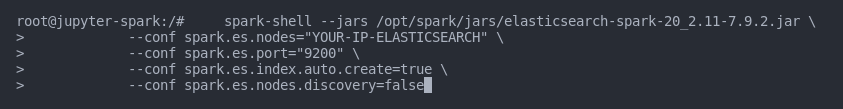


With Scala, I'll pass these commands to save directly to ElasticSearch with the function:
**_.saveToES("index_name")_*

    import org.elasticsearch.spark.sql._
    val view3 = spark.read.option("inferSchema",true).option("header",true).csv("/user/hive/warehouse/elastic_search/view3_elastic_search.csv")
    view3.show()
    view3.saveToEs("view3_elastic_search_index")
    
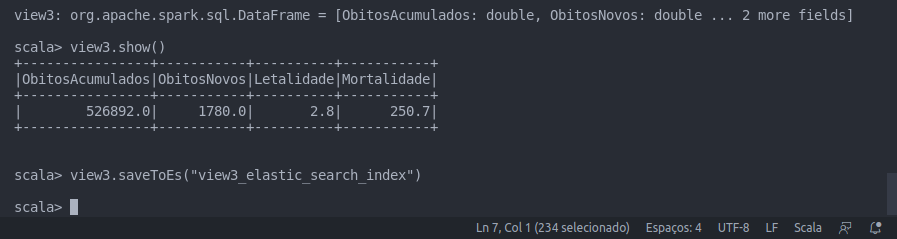

Let's check!

    # es = org.elasticsearch.spark.sql #
    val check_view3 = spark.read.format("es").load("view3_elastic_search_index")
    check_view3.select("ObitosAcumulados","ObitosNovos","Letalidade","Mortalidade").show()
    
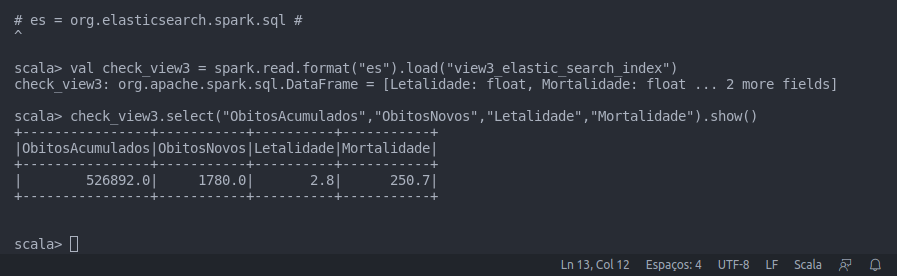


I'm going to check now, through my UI, if the file really went there!

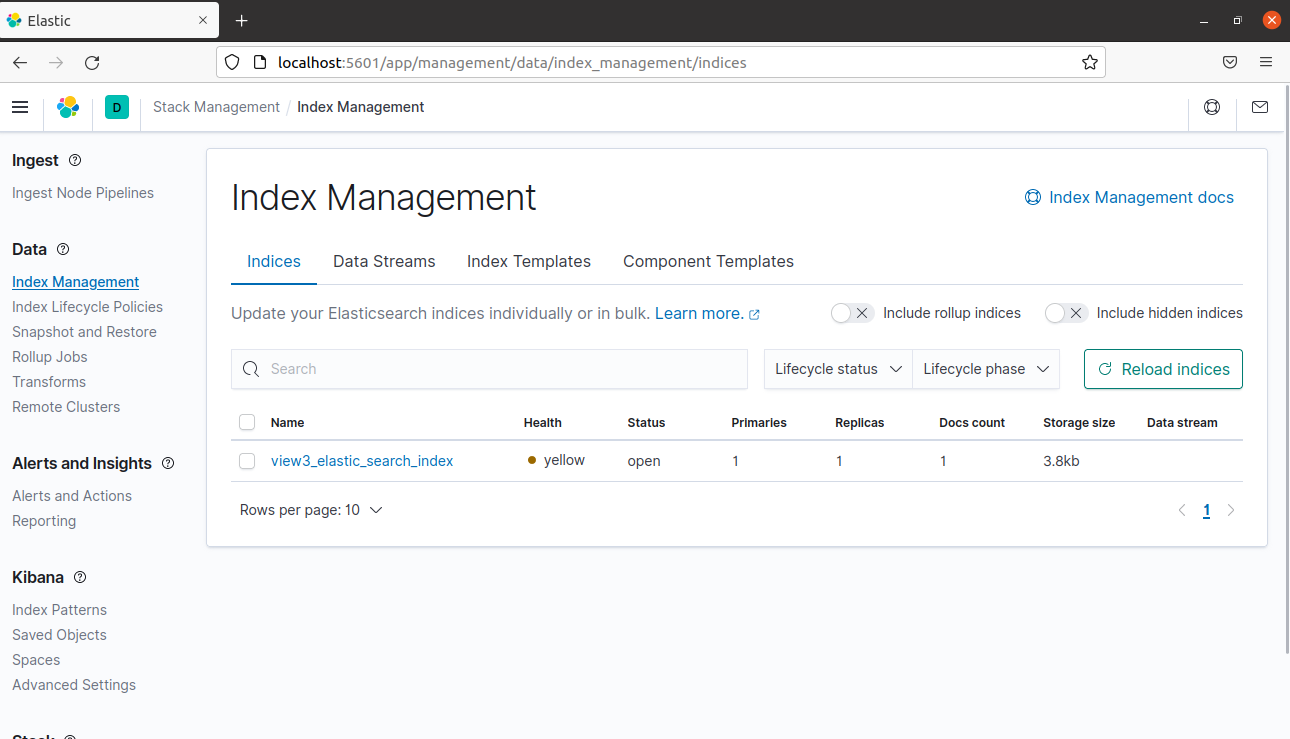

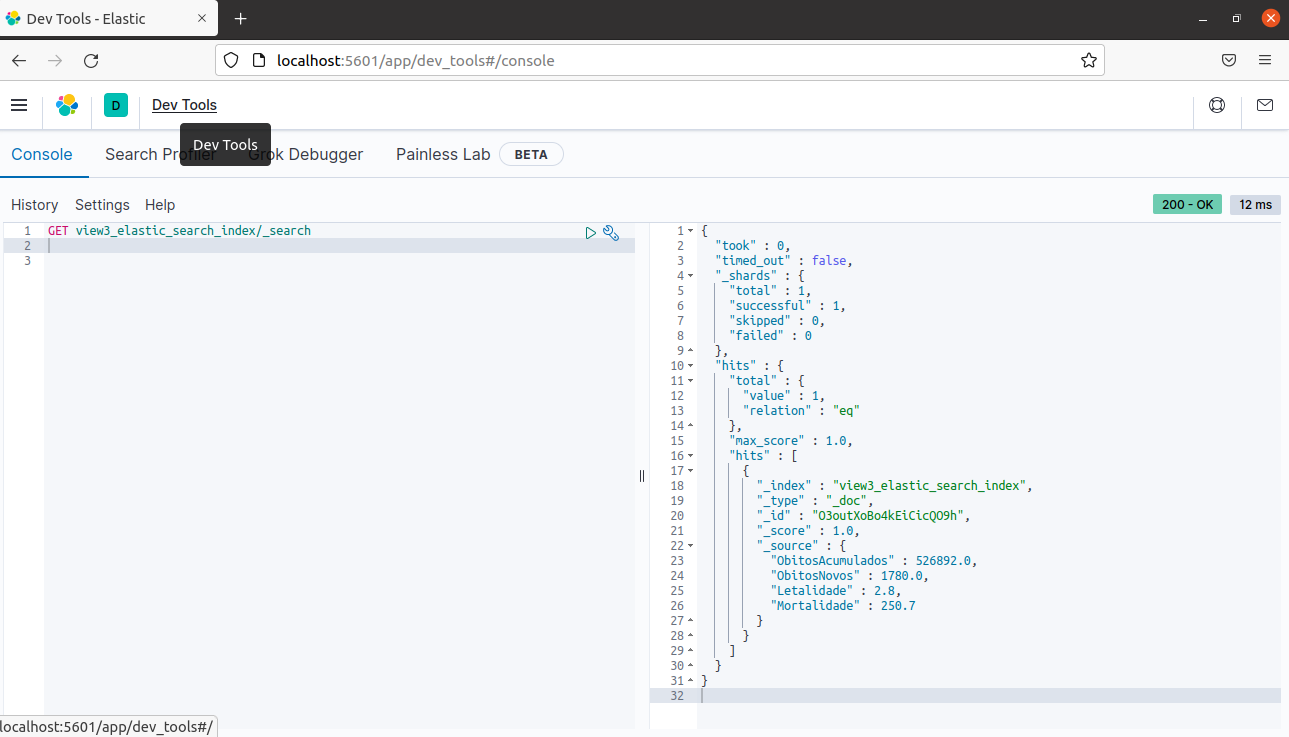

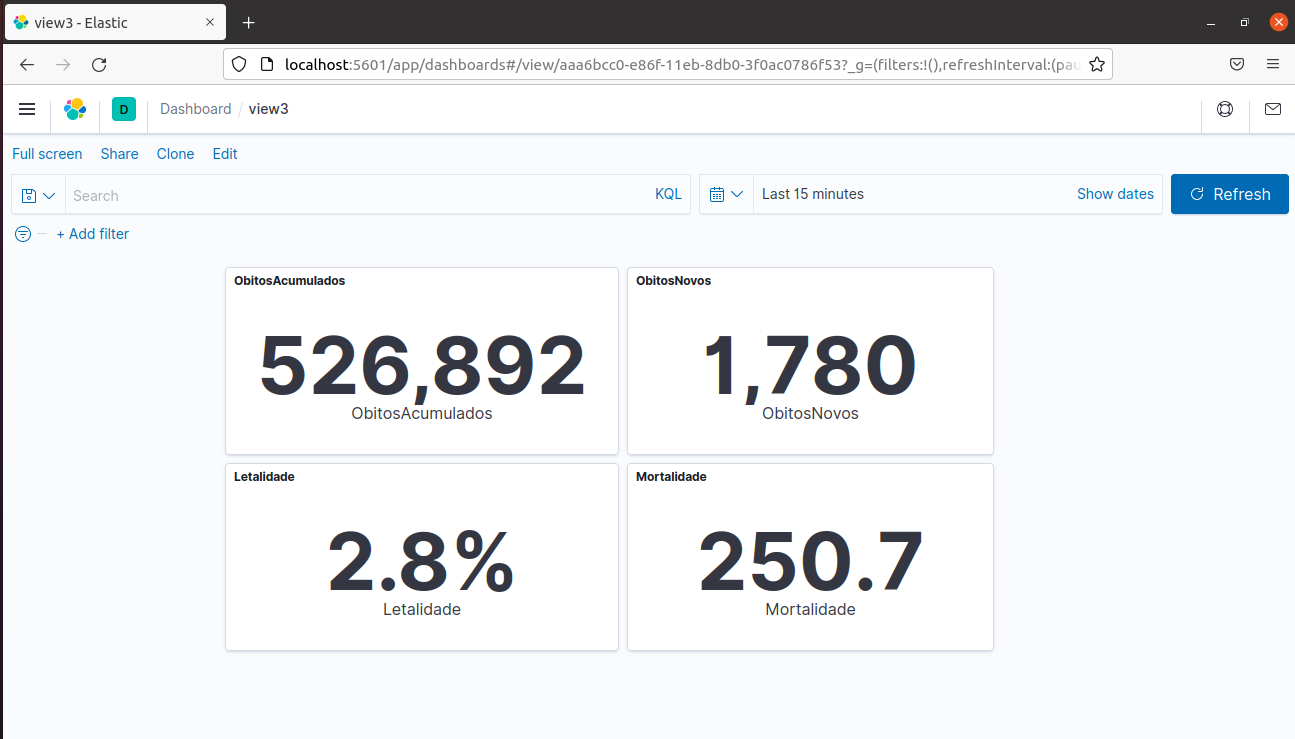